### This notebook is about exploratory data analysis and it could be summerized as follows:

- Data fact sheet: Ratio of missing value for each column
- We have exclueded some attributes that are irrevelent to the charges.
- Aggregated attributes by time and spatial

Oh and I use python3

In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 13, 7
rcParams['figure.figsize'] = 13, 7
rcParams["xtick.labelsize"] = 16
rcParams["ytick.labelsize"] = 16
rcParams["axes.labelsize"] = "x-large"
%matplotlib inline

In [45]:
def lookup(s):
    """
    speed up date-parse
    """
    dates = {date:pd.to_datetime(date, errors='coerce') for date in s.unique()}
    return s.map(dates)

def barplot(df, attribute, top=5):
    fig, ax = plt.subplots()
    df_plt = df.groupby([attribute]).size().sort_values(ascending=False
                                                       ).head(top).sort_values(
                                                        ascending=True)
    df_plt.plot(kind="barh", ax=ax)
    plt.xlabel("No. of Cases")
    

In [22]:
df = pd.read_excel("../data/hackathon-CUSP-WI_clean.xls")

#### You can find null value ratio in csv file! There are too many value to visualize here.

In [23]:
count_nan = len(df) - df.count()

In [24]:
pd.DataFrame(count_nan.sort_values(ascending=True)/(1.0*len(df))
            ).rename(columns={0:"null_ratio"}).to_csv('../data/fact_to_whole_data_set.csv')

#### we remove columns full of null value for EDA. Those columns will be back when we build the predicitve model


In [25]:
df2 = df.copy()
clean = df2.dropna(axis=1, how='all')
clean["Ref Date"] = lookup(clean["Ref Date"])

In [26]:
irrevelent_code = ["973.076(2)(a)", "343.44(1)(b)&(2)(ar)2", "976.03"]
clean = clean[~clean["Summary Charge Statute #"].isin(irrevelent_code)]

#### Check the unique values within each column

In [27]:
column_list = clean.columns.values.tolist()
for column_name in column_list:
    if len(clean[column_name].unique()) <= 2:
        print ("{} might be binary or numeric column".format(column_name))
    else:
        print("{} has {} unique values".format(column_name, len(clean[column_name].unique())))

DA Case Status has 23 unique values
Ref Date has 11271 unique values
Referral Type has 5 unique values
Ref Agency has 40 unique values
Primary Officer has 206 unique values
Prosecutor has 13 unique values
Unit has 13 unique values
Defendant City has 157 unique values
Defendant State has 6 unique values
Defendant Zip has 131 unique values
Defendant Race has 8 unique values
Defendant Gender has 3 unique values
Defendant's Age at Incident has 73 unique values
Defendant’s Arrest Status has 3 unique values
CC# Year has 22 unique values
Incident Date has 4630 unique values
Municipality has 27 unique values
Incident Zip has 18 unique values
Type has 8 unique values
Summary Charge Statute # has 518 unique values
Summary Charge Desc has 499 unique values
Severity has 5 unique values
Class has 13 unique values
Charge Status has 10 unique values
Charge Dispo has 21 unique values
Dispo Date has 746 unique values
Modifier has 5 unique values
Enhancer1 has 18 unique values
Enhancer2 has 12 unique va

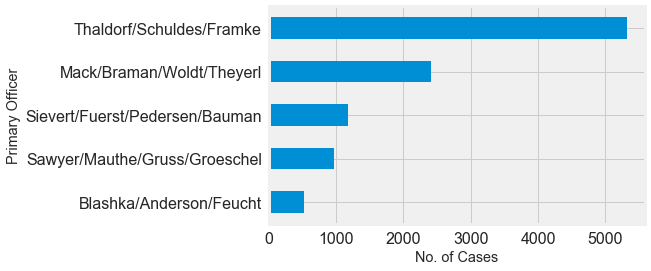

In [46]:
barplot(clean, "Primary Officer")

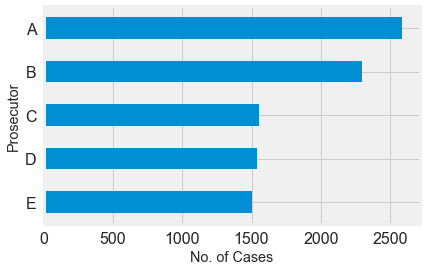

In [47]:
barplot(clean, "Prosecutor")

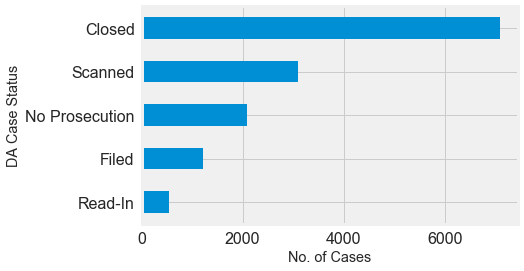

In [48]:
barplot(clean, "DA Case Status")

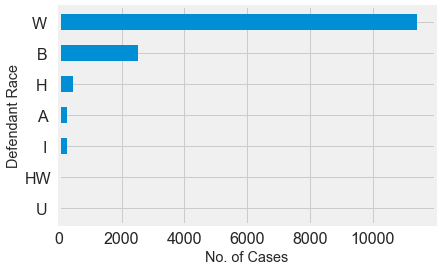

In [49]:
barplot(clean, "Defendant Race", 8)

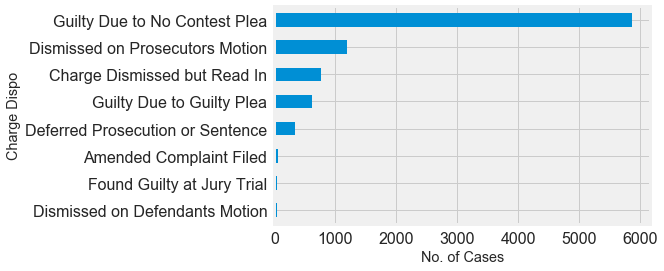

In [70]:
barplot(clean, "Charge Dispo", 8)

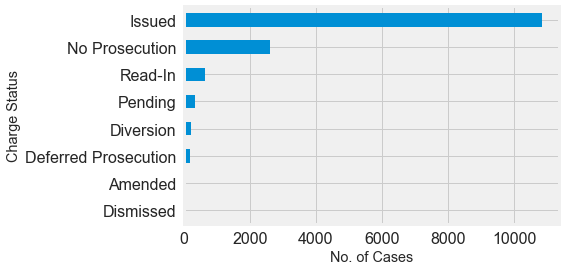

In [71]:
barplot(clean, "Charge Status", 8)

#### Most the Charge status are issued and top three issued dispo are 

1) Guilty Due to No Contest Plea

2) Dismissed on Prosecutors Motion

3) Charge Dismissed but Read In


There are lots of interesteing facts and concern in the following table. Firstly, if we are trying to build a classfier for the dataset. It will be super bias due to most of the data are issued. Secondly, regarding to the bias data set, what does the client really wants to know? what would be the cost that will caused by Deferred Prosecution, Dismissed or No prosecution. Finally, let's say we only look into the issued data, most of cases are "Guilty Due to No Contest Plea". Is that a good thing for social justice or 

In [89]:
attribute = ["Charge Dispo", "Charge Status"]
df_plt = df.groupby(attribute).size().sort_values(ascending=False
                                                   ).unstack().fillna(0)
df_plt

Charge Status,Amended,Deferred Prosecution,Dismissed,Diversion,Issued,No Prosecution
Charge Dispo,,,,,,
Administrative Disposition,0.0,0.0,0.0,0.0,1.0,0.0
Amended By Prosecutor Or Court,0.0,0.0,0.0,0.0,17.0,0.0
Amended Complaint Filed,0.0,3.0,0.0,0.0,53.0,0.0
Charge Dismissed but Read In,0.0,8.0,0.0,3.0,747.0,0.0
Deferred Prosecution or Sentence,0.0,160.0,0.0,154.0,24.0,0.0
Discharged After Being Found Incompetent,0.0,0.0,0.0,0.0,3.0,0.0
Dismissed Before Initial Appearance,0.0,0.0,0.0,0.0,33.0,0.0
Dismissed on Courts own Motion,0.0,0.0,0.0,0.0,5.0,0.0
Dismissed on Defendants Motion,0.0,0.0,1.0,0.0,35.0,0.0


#### I change the evaluation matrix of ZIPCODE in log level which shows more detail about the relationship between defendents and incident area.

In [63]:
# whole matrix can be found here
zipcode_heat = clean.groupby(["Defendant Zip", "Incident Zip"]).size().unstack(
).fillna(0)
log_heat = zipcode_heat.applymap(np.log)

In [50]:
sample = pd.DataFrame(clean.groupby(["Defendant Zip", "Incident Zip"]).size(
).sort_values(ascending=False).head(30).unstack().fillna(0)).applymap(np.log)

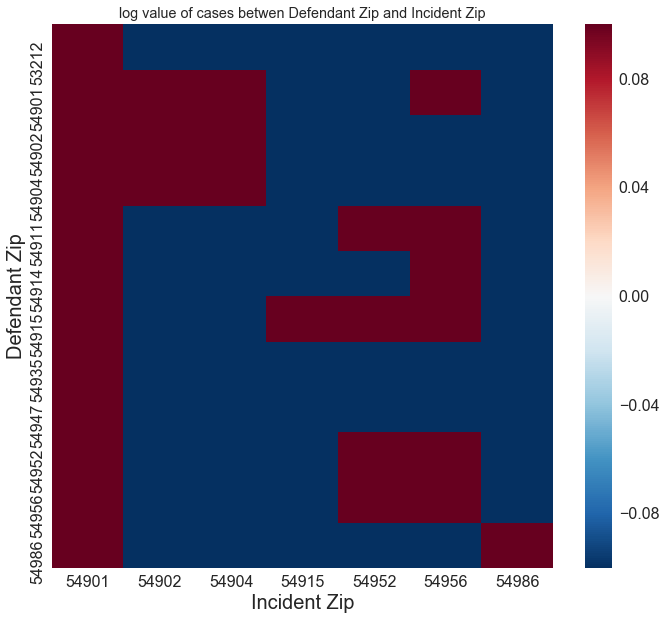

In [52]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(sample)

ax.set_xlabel("Incident Zip", fontsize=20)
ax.set_ylabel("Defendant Zip", fontsize=20)
plt.savefig("heatmap_incdient.png")
plt.title("log value of cases betwen Defendant Zip and Incident Zip")

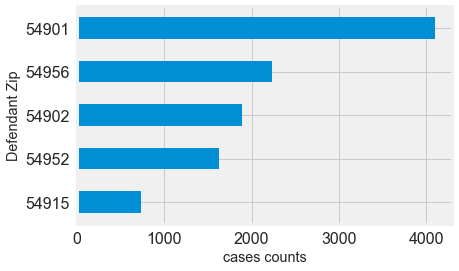

In [39]:
barplot(clean, "Defendant Zip")

#### Try to plot network here but not really useful

In [56]:
centroid = pd.read_csv("../data/wi_centroid.csv",index_col=0)

In [58]:
import geopandas as gpd
from fiona import crs
centroid = gpd.GeoDataFrame(centroid)
centroid.crs = {'init': 'epsg:3071'}
centroid.head()

,GEOID10,geometry,centroid,area
0,53406,"POLYGON ((697001.6339924306 259111.7556624794,...",POINT (694791.8421371196 253030.3776194569),1.546982
1,53501,MULTIPOLYGON (((596174.0940122458 237123.92080...,POINT (596654.5249659717 237509.7574519539),0.006053
2,53502,"POLYGON ((563220.2822070753 257889.5610522227,...",POINT (565686.2667921071 251304.0815120926),4.764290
3,53503,"POLYGON ((533175.327644023 296071.6486484241, ...",POINT (523567.9509882115 296291.9851296617),5.376877
4,53504,"POLYGON ((540004.2325915087 255346.6063553197,...",POINT (531459.7469693656 247978.3840172211),8.538691


In [59]:
centroid = centroid.rename(columns={"GEOID10": "Defendant Zip"})
centroid = centroid.set_index("Defendant Zip")

In [66]:
merge = zipcode_heat.join(centroid)
normalized_area_siza = merge[result.columns.values[:-1]] / pd.to_numeric(merge["area"])

In [68]:
# output data preprocessing result
clean.to_csv("../data/prepocessed_data.csv")

In [67]:
# here try to use attributes are in all the cases to understand the cases
EDA_only = clean[~clean["Charge Dispo"].isnull()]

#### Data Engineering for spatial visualization

In [195]:
## output the data for map
spatial_visaul = clean[["Incident Zip","Severity", "Class"]].dropna()
spatial_visaul["new_set"] = spatial_visaul["Severity"].str.strip() + "_" + \
spatial_visaul["Class"]
spatial_visaul.groupby(["Incident Zip", "new_set"]).size(
).unstack().fillna(0).to_csv("spatial_visual.csv")

In [247]:
output2 = pd.DataFrame(spatial_visaul.groupby(["Incident Zip", "new_set"]).size())

In [248]:
output2 = output2.reset_index()

In [249]:
idx = output2.groupby(['Incident Zip'])[0].transform(max) == output2[0]

In [250]:
outputfile = output2[output2.columns.values[:2]][idx]

In [251]:
def replace_str(x):
    return "https://www.unitedstateszipcodes.org/{}/#stats".format(str(x))

outputfile["description"] = outputfile["Incident Zip"].apply(replace_str)

In [254]:

outputfile[:-1].to_csv("output_file.csv")